# Sports and entertainment company analysis

**In this project I will analyze an SQL database of a sports and entertainment company that rents out it facilities to a various number of members (mainly focused on July and August of the year in question). I will try to create a big dataset in mySQL (the database contains 3 tables with important information about the company), then I will export the dataset as a CSV file, then read it in python and further analyze it in this notebook. I will try to find the most 'loyal' customer (so the member that books the faciities the most), I will try to get the performance for each facility (if it brings or loses money) and any kind of other analysis that I will see important for this dataset.**

**First, let's understand the data that we will use. For simplicity I will use screenshots of my MySQL Workbench**

First table of the database is the 'bookings' table, that represents as follows:

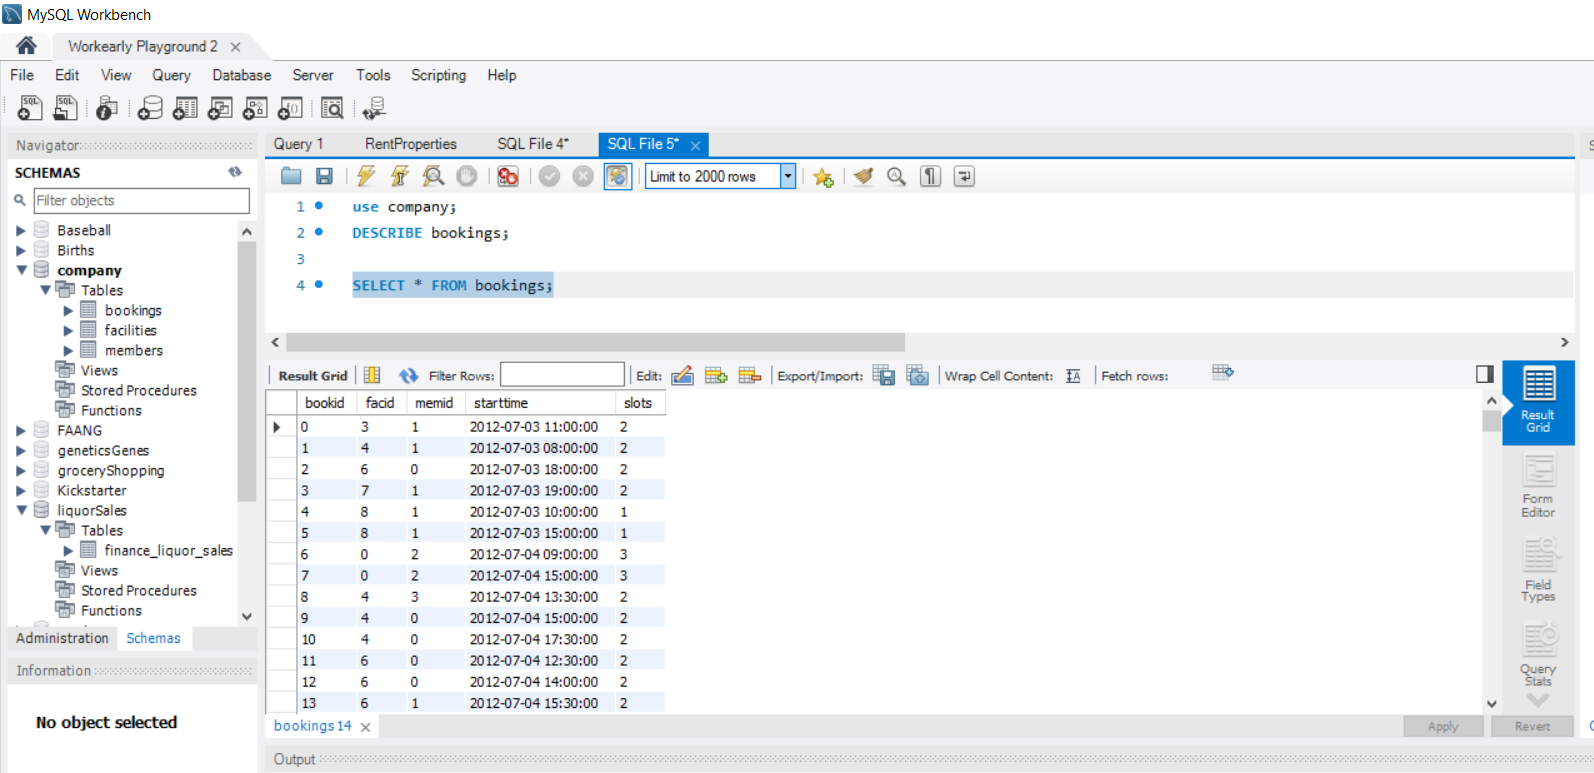

- 'bookid' - ID of the booking

- 'facid' - facility ID, as in which facility is being booked

- 'memid' - member ID, as in which member has booked the facility

- 'starttime' - exact start time of the booking

- 'slots' - how many slots did the person book for that particular facility

Let's explore the next table called 'faciities' and see how they connect:

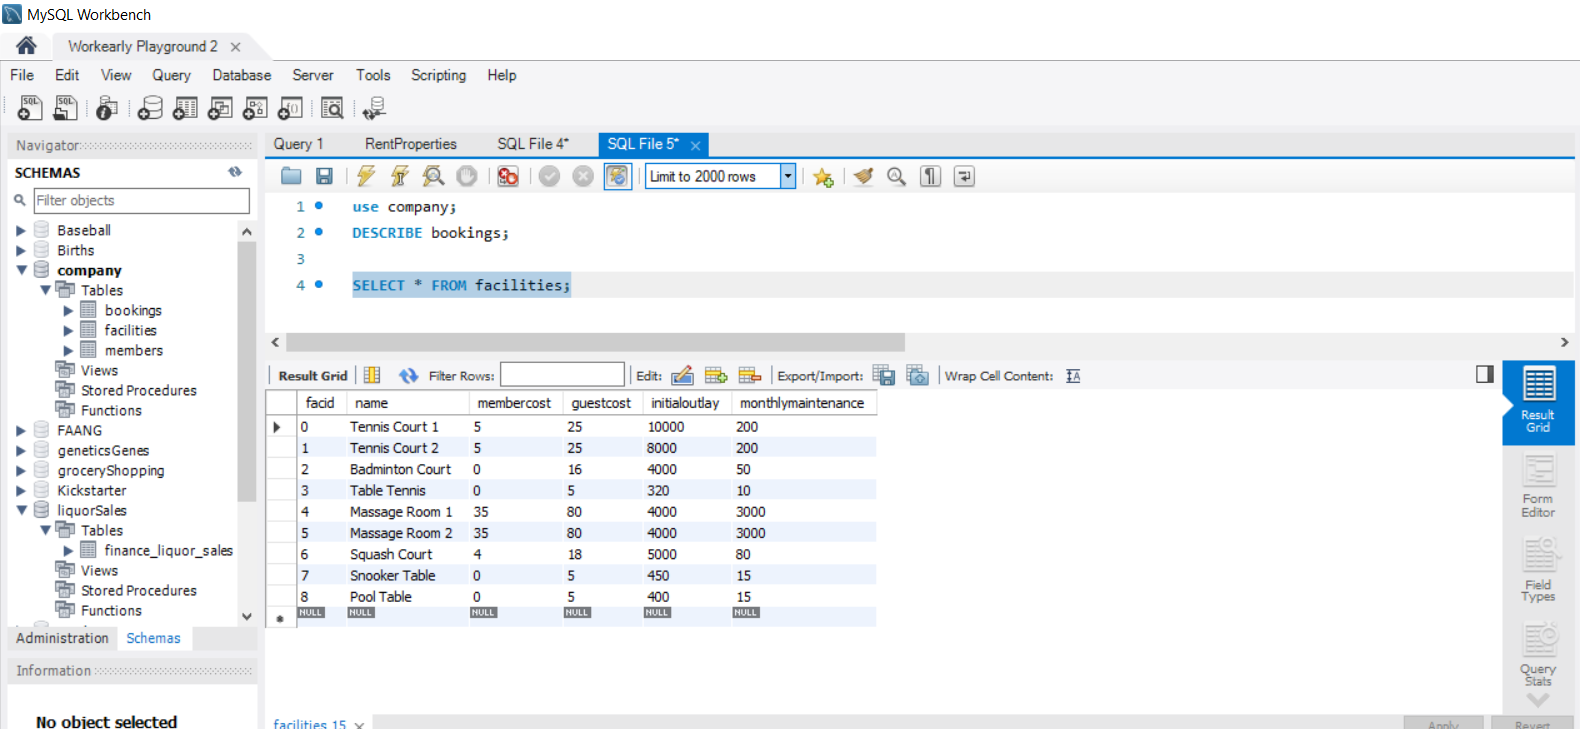

We can see that the company has 9 facilities to offer, let's understand the columns:

- 'facid' - it's already known from the previous table, and it stands as a primary key in this table and a foreign key to the 'bookings' table; it could be useful when we try to join the tables

- 'name' - it's the actual name of the offered service/facility

- 'membercost' - how much the booking of the facility costs for a member

- 'guestcost' - how much the booking of the facility costs for a non-member

- 'initialoutlay' - it isn't very clear, however a good guess could be how much was paid for the building of the facilities

- 'monthlymaintenance' - exactly how much money goes away on maintenance every month

- All prices are in dollars

Last table of the dataset is the 'members' table. Let's understand it:

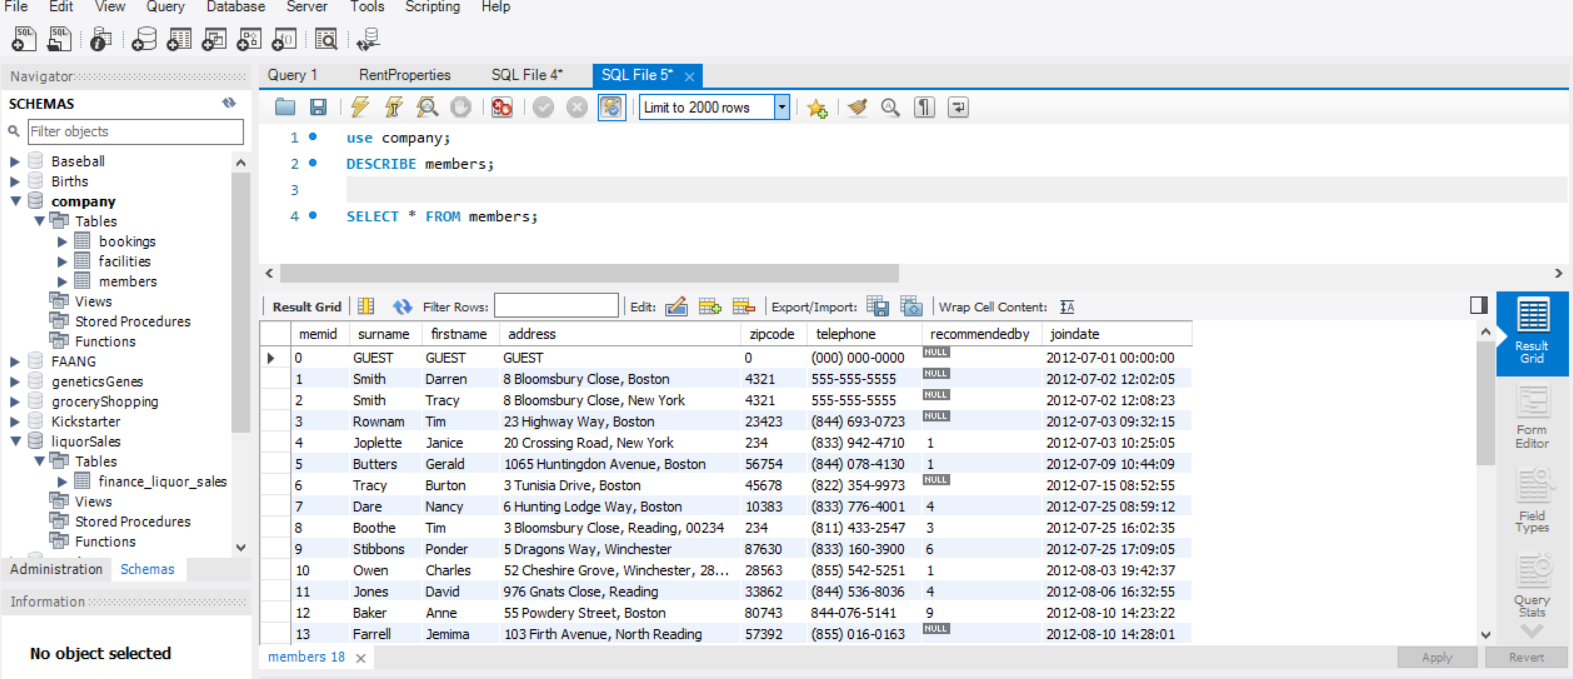

- 'memid' - already known from the first table, again, a good column to join the tables on

- 'surname' and 'firstname' - these are self-explanatory

- 'adress' - residence of the member

- 'zipcode' - zipcode for each members location

- 'telephone' - phone number

- 'recommendedby' - if a member was recommended by another member, and if yes which member

- 'joindate' - the date in which the member joined the company (for guest members it's just an arbitrary date and hour)

**Before joining all the data together, let's explore some facts that seem interesting to me using SQL**


First I would like to have a comparison between the number of bookings that are choosing free/cheapest services (snooker, pool, table tennis, badminton) versus the most expensive service (massage)



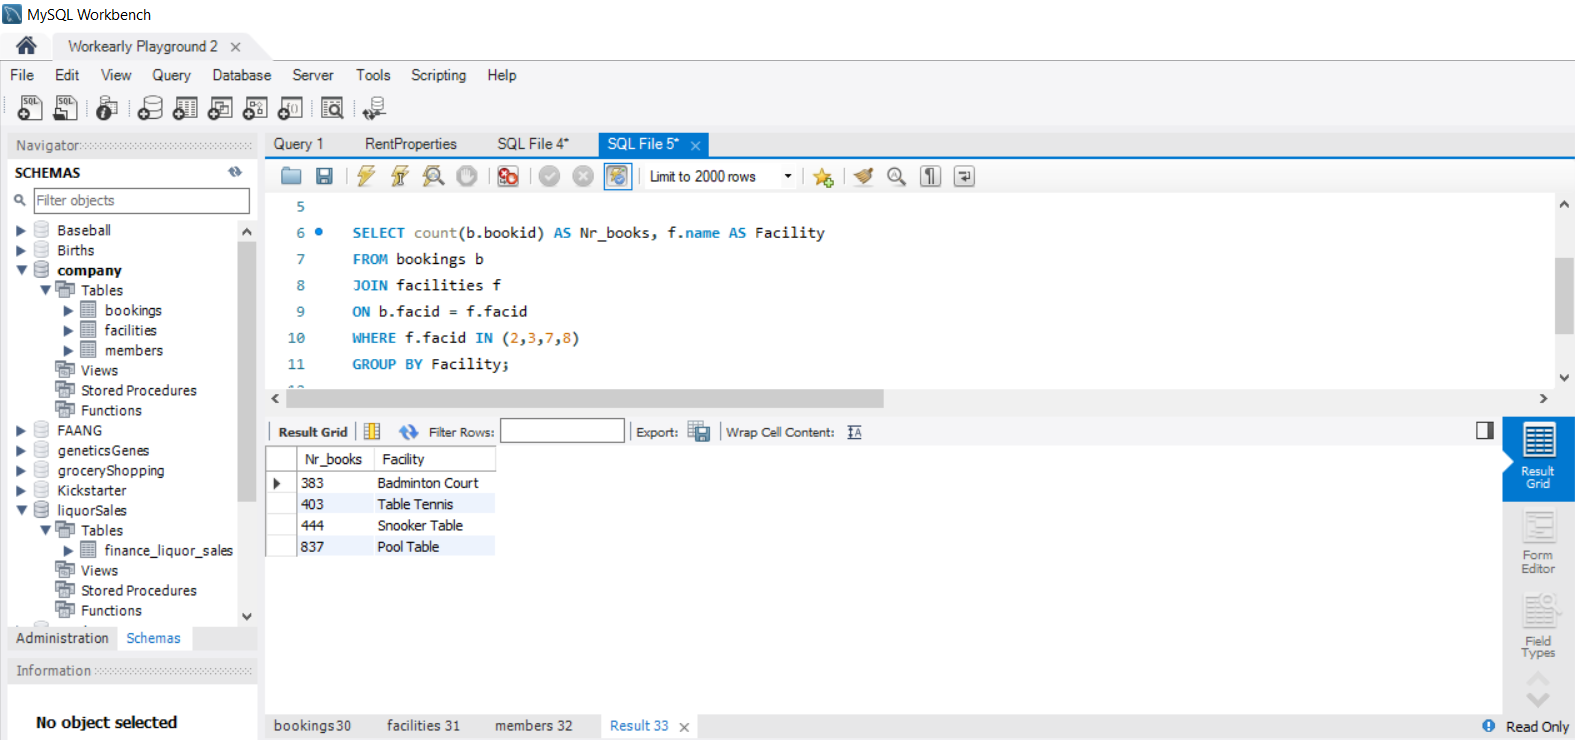

- It is somewhat understandable that the pool table is the most popular one, since it's the one that requires least skill and can be easily played with anybody for a fun time

In [1]:
#The total of these services however:
383 + 403 + 444 + 837

2067

So we have 2067 bookings for the free/cheapest services. Let's see if the people choose comfort and relax over a quick game of pool, snooker, etc:

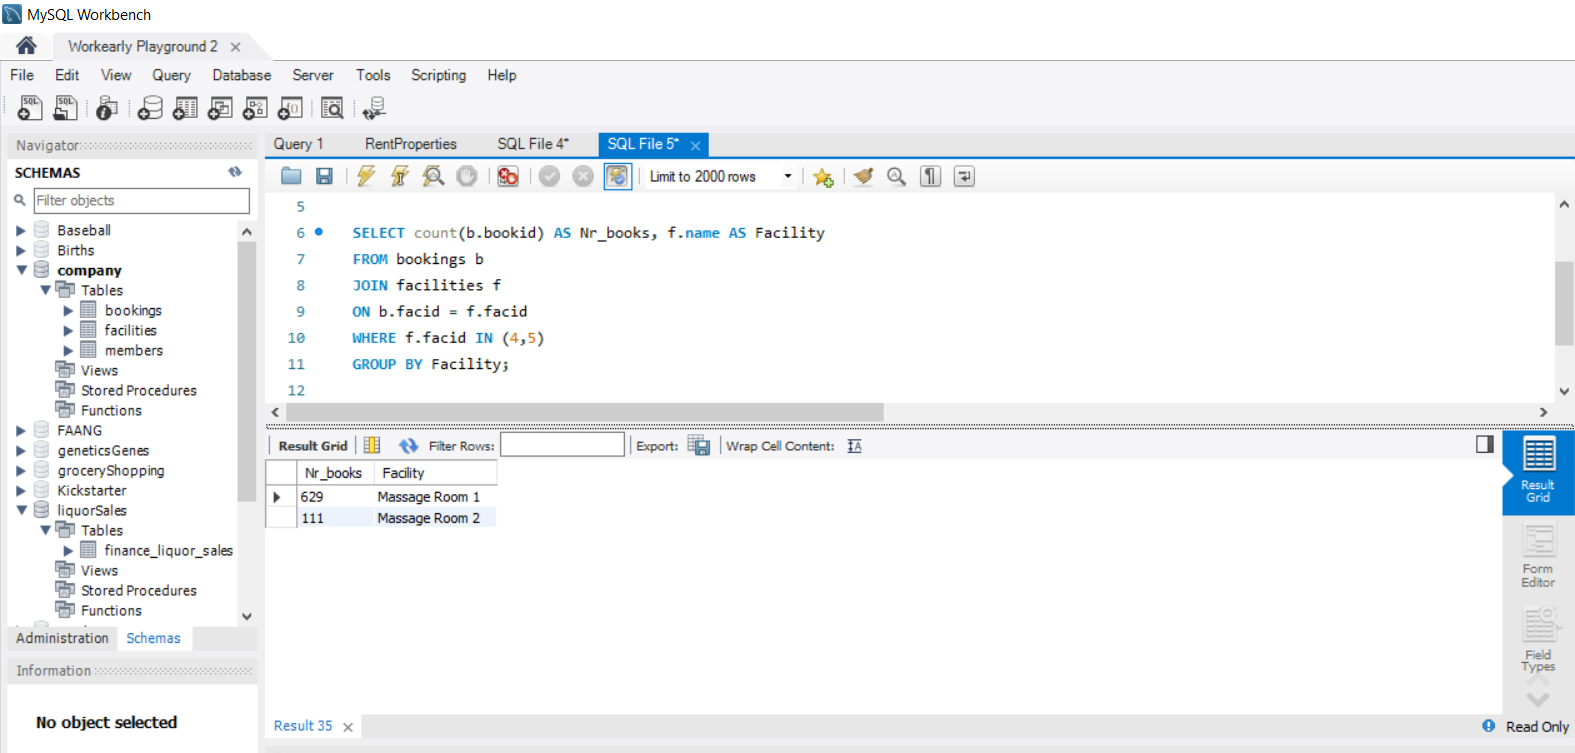

In [2]:
#The total of the massage services:
629 + 111

740

- Honestly, as expected, people tend to choose a cheap and fun time, over an expensive and relaxing one. This analysis was just a personal curiosity of mine, however, the company should look into the client feedback for massage room 2, since it's doing poorly compared to the first massage room (maybe the quality of the massage is not up to standards, or the aspect of the room, etc.)

Let's suppose the company wants to do an AD based on the 'tennis' keyword, and this company needs to know the members which used the tennis or table tennis courts, to send out personalized ads:

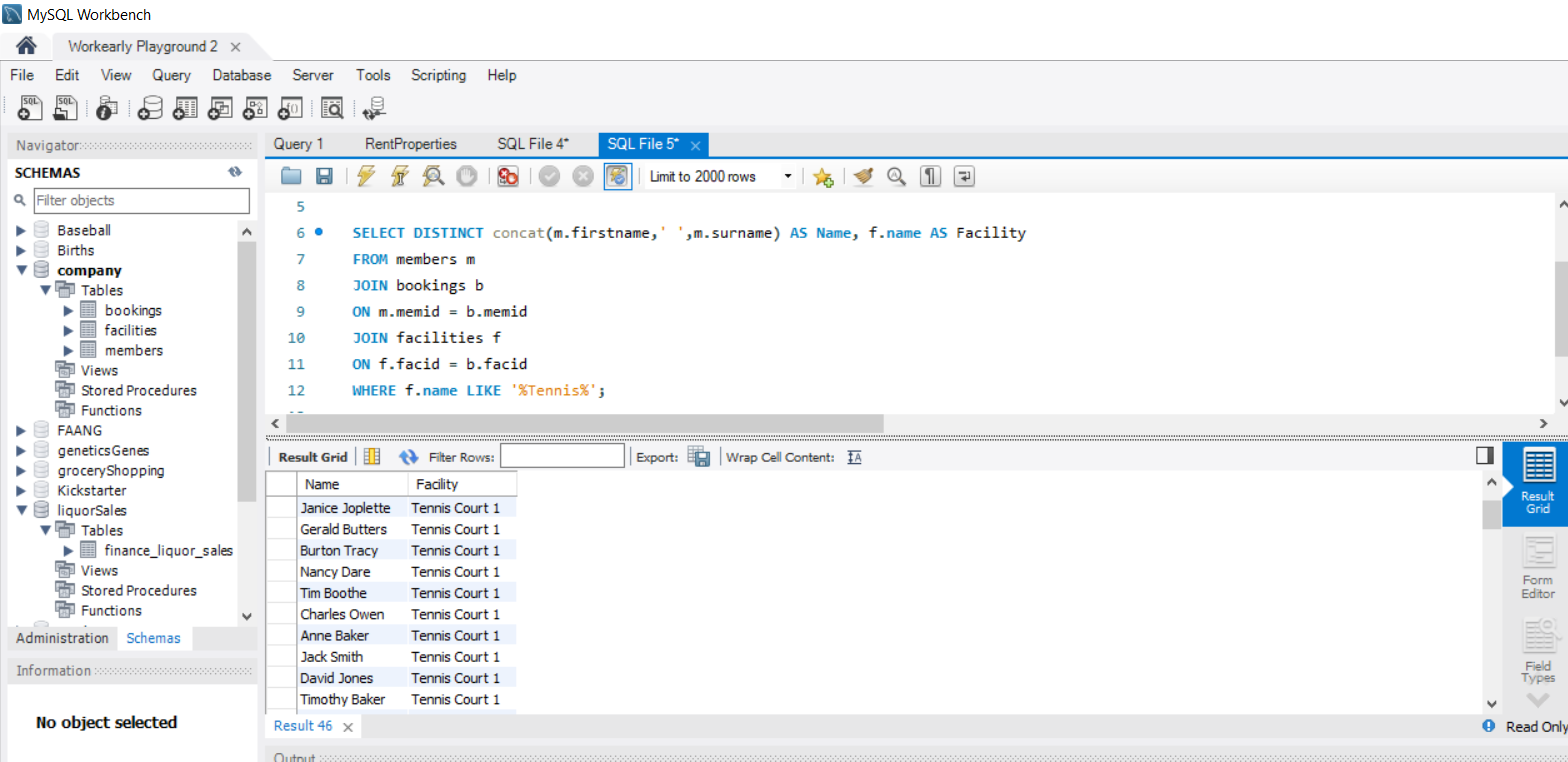

The personalized ads can be easily sent out to the reported members

In the next query I would like to showcase the total revenue brought in by each facility (it is important here to keep in mind that the prices vary from guests to members)

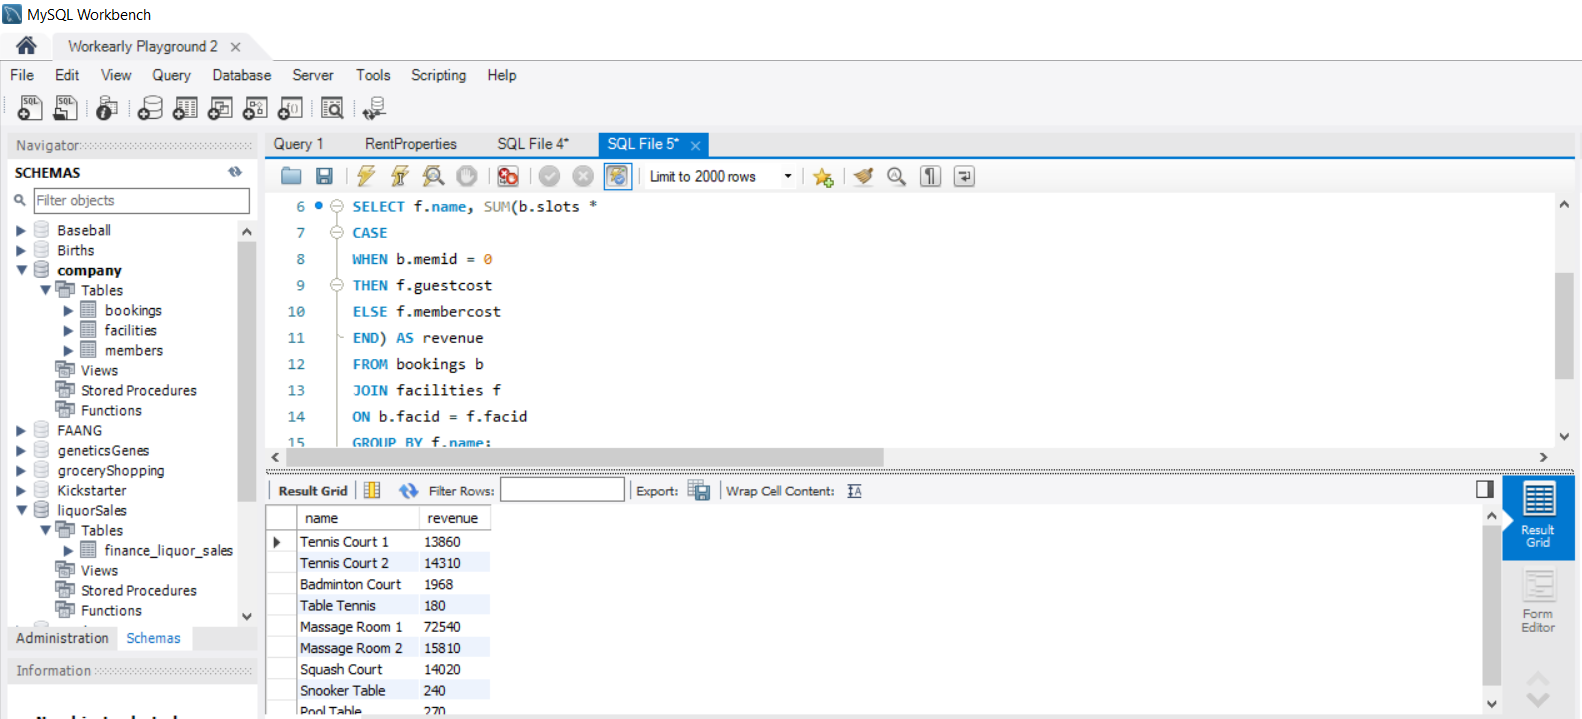


- We can see that the massage room 1 brought in the highest revenue in the last 2 months, however, the gap between the two massage rooms is extremely big, I hope they fixed it meanwhile :)

The last query that I will perform before exporting the dataset is a recursive query. All other queries could have been easily done in python, but the next query I'm finding more comfortable to be done in SQL. The next query will print out a recommandation chain: so X got recommanded by Y, who got recommanded by Z and so on

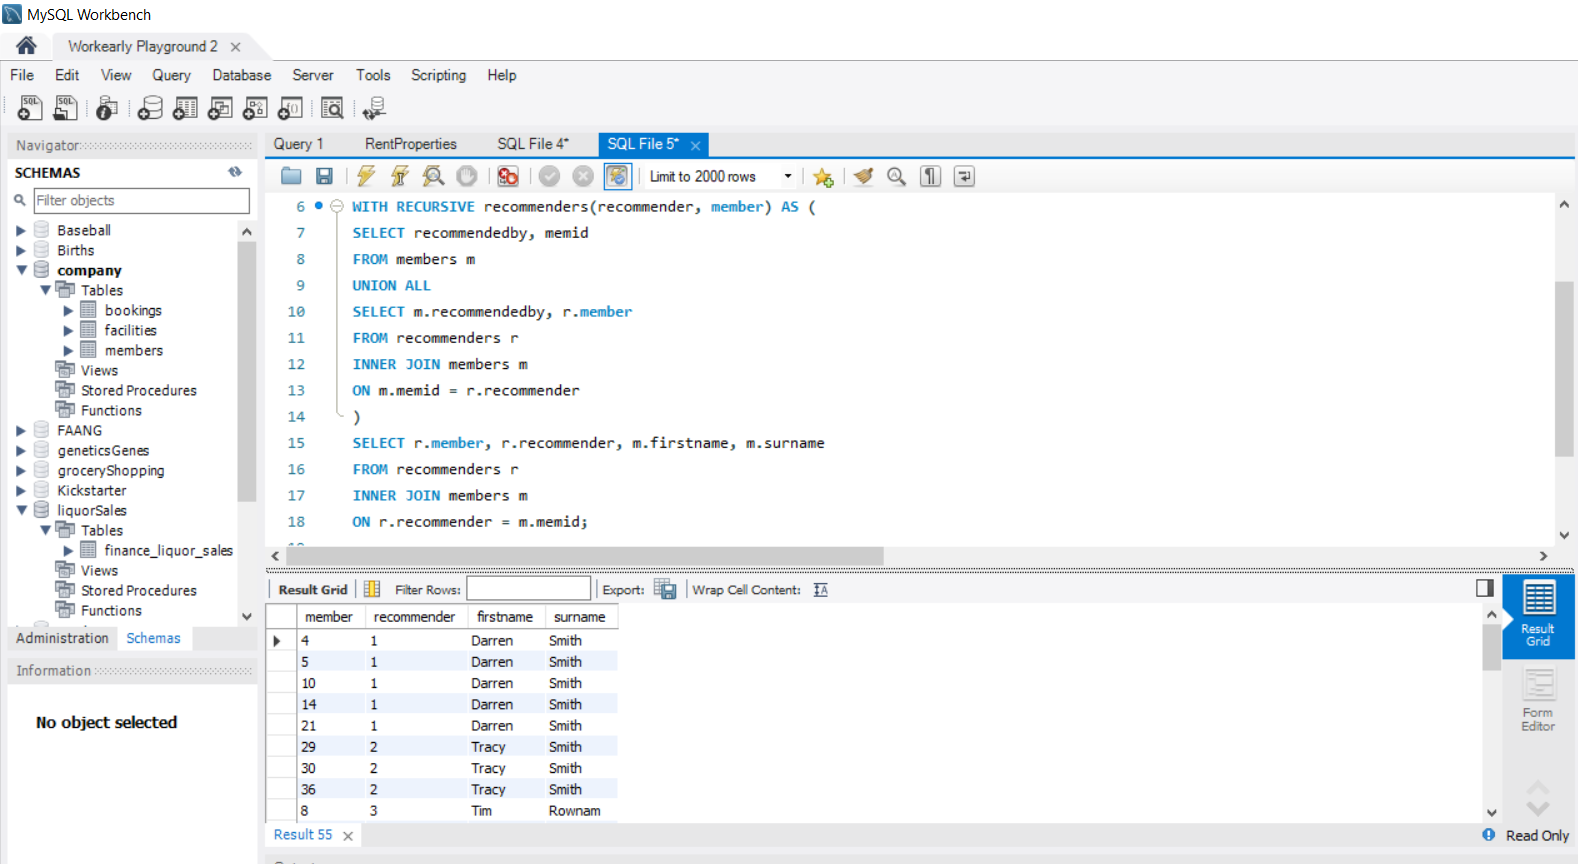




The last step using SQL is to prepare a final dataset to then be exported as a .csv file. Let's do it!


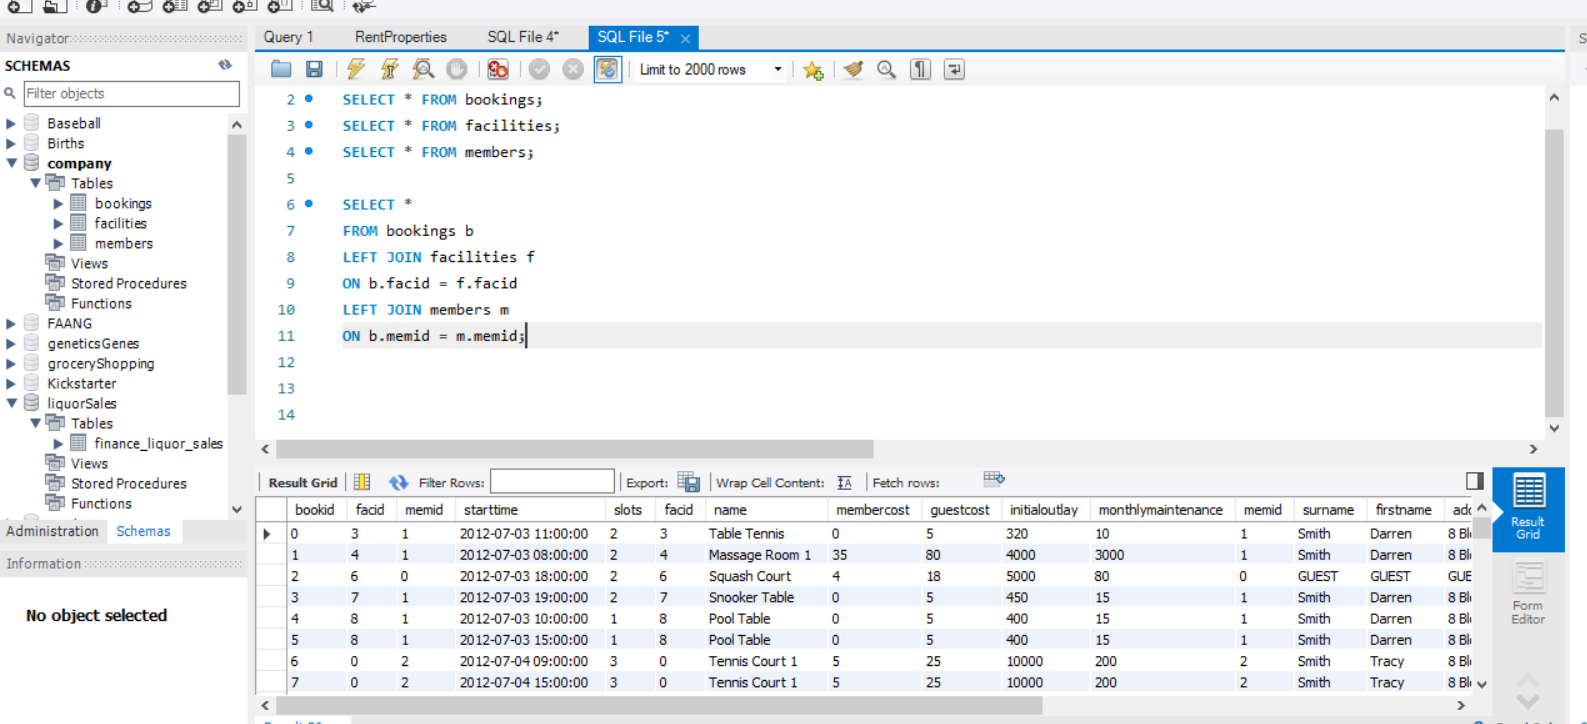

We have succesfully concatonated the three tables, now it's time to open the dataset here in the notebook, and use python to drop some columns, to deal with missing data, etc.

**Further exploring the dataset using Python**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

In [4]:
df = pd.read_csv('S-E Comapny.csv', parse_dates=True)

In [5]:
df.head()

,bookid,facid,memid,starttime,slots,facid.1,name,membercost,guestcost,initialoutlay,monthlymaintenance,memid.1,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,3,1,2012-07-03 11:00:00,2,3,Table Tennis,0,5,320,10,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,NaN,2012-07-02 12:02:05
1,1,4,1,2012-07-03 08:00:00,2,4,Massage Room 1,35,80,4000,3000,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,NaN,2012-07-02 12:02:05
2,2,6,0,2012-07-03 18:00:00,2,6,Squash Court,4,18,5000,80,0,GUEST,GUEST,GUEST,0,(000) 000-0000,NaN,2012-07-01 00:00:00
3,3,7,1,2012-07-03 19:00:00,2,7,Snooker Table,0,5,450,15,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,NaN,2012-07-02 12:02:05
4,4,8,1,2012-07-03 10:00:00,1,8,Pool Table,0,5,400,15,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,NaN,2012-07-02 12:02:05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookid              2000 non-null   int64  
 1   facid               2000 non-null   int64  
 2   memid               2000 non-null   int64  
 3   starttime           2000 non-null   object 
 4   slots               2000 non-null   int64  
 5   facid.1             2000 non-null   int64  
 6   name                2000 non-null   object 
 7   membercost          2000 non-null   int64  
 8   guestcost           2000 non-null   int64  
 9   initialoutlay       2000 non-null   int64  
 10  monthlymaintenance  2000 non-null   int64  
 11  memid.1             2000 non-null   int64  
 12  surname             2000 non-null   object 
 13  firstname           2000 non-null   object 
 14  address             2000 non-null   object 
 15  zipcode             2000 non-null   int64  
 16  teleph

We can see that we don't really have to deal with missing data, only at the 'recommendedby' column, but since more than 60% of the data is missing, I will simply drop that column, since it not so important (given the fact that I already got the people who offered recomandations in the SQL query earlier) 

In [7]:
df.describe()

,bookid,facid,memid,slots,facid.1,membercost,guestcost,initialoutlay,monthlymaintenance,memid.1,zipcode,recommendedby
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,773.000000
mean,999.500000,4.273500,4.729000,2.26400,4.273500,8.180500,26.079000,3805.620000,632.150000,4.729000,22175.002500,4.080207
std,577.494589,2.741068,4.675199,0.92235,2.741068,13.157145,27.230544,3279.636996,1149.205514,4.675199,26528.546619,3.812481
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,5.000000,320.000000,10.000000,0.000000,0.000000,1.000000
25%,499.750000,2.000000,1.000000,2.00000,2.000000,0.000000,5.000000,400.000000,15.000000,1.000000,234.000000,1.000000
50%,999.500000,4.000000,3.000000,2.00000,4.000000,4.000000,18.000000,4000.000000,80.000000,3.000000,4321.000000,3.000000
75%,1499.250000,7.000000,8.000000,3.00000,7.000000,5.000000,25.000000,5000.000000,200.000000,8.000000,45678.000000,6.000000
max,1999.000000,8.000000,20.000000,9.00000,8.000000,35.000000,80.000000,10000.000000,3000.000000,20.000000,87630.000000,13.000000


First order of action is to drop the duplicate columns: facid1,memid1 and of course the recommended by column

In [8]:
df = df.drop(['memid.1', 'facid.1', 'recommendedby'], axis = 1)

In [10]:
df.head(20)

,bookid,facid,memid,starttime,slots,name,membercost,guestcost,initialoutlay,monthlymaintenance,surname,firstname,address,zipcode,telephone,joindate
0,0,3,1,2012-07-03 11:00:00,2,Table Tennis,0,5,320,10,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05
1,1,4,1,2012-07-03 08:00:00,2,Massage Room 1,35,80,4000,3000,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05
2,2,6,0,2012-07-03 18:00:00,2,Squash Court,4,18,5000,80,GUEST,GUEST,GUEST,0,(000) 000-0000,2012-07-01 00:00:00
3,3,7,1,2012-07-03 19:00:00,2,Snooker Table,0,5,450,15,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05
4,4,8,1,2012-07-03 10:00:00,1,Pool Table,0,5,400,15,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05
5,5,8,1,2012-07-03 15:00:00,1,Pool Table,0,5,400,15,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05
6,6,0,2,2012-07-04 09:00:00,3,Tennis Court 1,5,25,10000,200,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,2012-07-02 12:08:23
7,7,0,2,2012-07-04 15:00:00,3,Tennis Court 1,5,25,10000,200,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,2012-07-02 12:08:23
8,8,4,3,2012-07-04 13:30:00,2,Massage Room 1,35,80,4000,3000,Rownam,Tim,"23 Highway Way, Boston",23423,(844) 693-0723,2012-07-03 09:32:15
9,9,4,0,2012-07-04 15:00:00,2,Massage Room 1,35,80,4000,3000,GUEST,GUEST,GUEST,0,(000) 000-0000,2012-07-01 00:00:00


Now the dataset is to my liking, let's explore it further!

#### I would like to see when do the facilities rent better. By when I mean what time of the day? 
- For this I will create 4 time intervals: morning (5:00-11:59), mid-day (12:00 - 17:59) , evening (18:00 - 23:59), night (24:00-4:59)

In [21]:
df['starttime'] = pd.to_datetime(df['starttime'])

In [22]:
df['joindate'] = pd.to_datetime(df['joindate'])

In [25]:
#Now that we have both timestamp columns in datetime format, let's get only the time from starttime:
def time_int(df):
    if df['starttime'].strftime('%H:%M') >= '05:00' and df['starttime'].strftime('%H:%M') <= '11:59':
        return 'Morning'
    if df['starttime'].strftime('%H:%M') >= '12:00' and df['starttime'].strftime('%H:%M') <= '17:59':
        return 'Midday'
    if df['starttime'].strftime('%H:%M') >= '18:00' and df['starttime'].strftime('%H:%M') <= '23:59':
        return 'Evening'
    else:
        return 'Night'
    
#Let's add this as a column:
df['Time of day'] = df.apply(time_int, axis = 1)

In [26]:
df.head()

,bookid,facid,memid,starttime,slots,name,membercost,guestcost,initialoutlay,monthlymaintenance,surname,firstname,address,zipcode,telephone,joindate,Time of day
0,0,3,1,2012-07-03 11:00:00,2,Table Tennis,0,5,320,10,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05,Morning
1,1,4,1,2012-07-03 08:00:00,2,Massage Room 1,35,80,4000,3000,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05,Morning
2,2,6,0,2012-07-03 18:00:00,2,Squash Court,4,18,5000,80,GUEST,GUEST,GUEST,0,(000) 000-0000,2012-07-01 00:00:00,Evening
3,3,7,1,2012-07-03 19:00:00,2,Snooker Table,0,5,450,15,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05,Evening
4,4,8,1,2012-07-03 10:00:00,1,Pool Table,0,5,400,15,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,2012-07-02 12:02:05,Morning


Since we have this new column, let's see how the bookings are distributed across this time periods, let's see if we learn some valuable information from this:

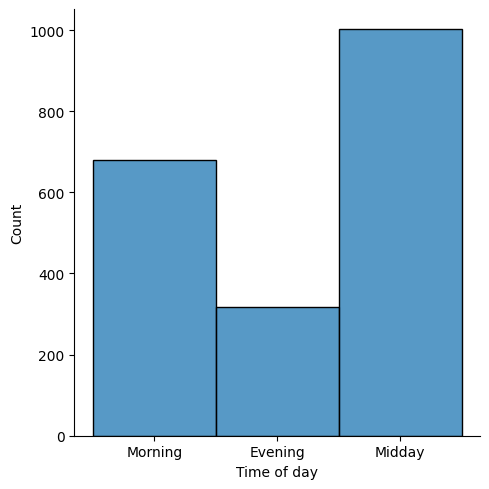

In [28]:
sns.displot(df['Time of day'], kde = False)

This result comes as a bit of a surprise for me, because I personally thought that most people would do sports and entertaining in the evening, but in this case has the lowest number of bookings (night doesn't even have a single booking)

It would be interesting to see which facilities are booked in what measure during this time of days:

In [35]:
fac_by_time = df.groupby(['Time of day', 'name'])['bookid'].count()
fac_by_time = fac_by_time.sort_values(ascending = False)

In [36]:
fac_by_time

Time of day  name           
Midday       Pool Table         196
             Massage Room 1     161
             Tennis Court 1     119
             Squash Court       119
Morning      Massage Room 1     113
Midday       Snooker Table      109
Morning      Pool Table         107
Midday       Tennis Court 2      99
             Badminton Court     91
             Table Tennis        85
Morning      Tennis Court 2      80
             Badminton Court     79
             Tennis Court 1      79
             Squash Court        76
             Snooker Table       68
Evening      Pool Table          65
Morning      Table Tennis        64
Evening      Massage Room 1      58
             Snooker Table       39
             Table Tennis        38
             Squash Court        34
             Tennis Court 2      27
             Tennis Court 1      25
Midday       Massage Room 2      23
Evening      Badminton Court     21
Morning      Massage Room 2      15
Evening      Massage Room 2      10

This grouping confirms that the most popular time of day is midday, where the most booked out facility is the pool table, a massage room and the tennis court and squash court equally. So it seems the people prefer to relax but also do sports around midday, which could make sense, if they do their booking right after work 

In [39]:
book_by_hour = df.groupby(df['starttime'].dt.strftime('%H:%M'))['bookid'].count()
book_by_hour = book_by_hour.sort_values(ascending = False)

In [40]:
book_by_hour

starttime
08:00    120
11:00    102
16:30    102
14:00     91
15:00     89
12:00     88
19:00     88
08:30     88
18:30     88
13:00     86
17:30     83
12:30     82
11:30     80
15:30     80
14:30     79
09:30     77
16:00     77
18:00     76
17:00     75
10:00     72
09:00     71
10:30     71
13:30     70
19:30     51
20:00     14
Name: bookid, dtype: int64

Again we come across an interesting insight, a lot of people prefer to book some sport activity before work, which again makes sense (they charge up with serotonin). After that first place, we see the midday values tending to dominate the bookings